In [196]:
from HistRF import HistRandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [197]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import math
import timeit
import matplotlib.pyplot as plt

In [198]:
X, y = make_classification(n_samples=50000, n_features=20, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [200]:
n_ests = 20

In [189]:
hrf_acc = []
hrf_time = []
x_bins = 0
num_bins = []
for i in range(8):
    x_bins += 1
    num_bins.append(x_bins)
    n_bins = 2 ** x_bins
    if (n_bins == 256):
        n_bins -= 1
    HRF = HistRandomForestClassifier(max_bins=n_bins, n_estimators=n_ests)
    start = timeit.default_timer()
    HRF.fit(X_train, y_train)
    time=timeit.default_timer() - start

    y_pred = HRF.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    hrf_time.append(time)
    hrf_acc.append(acc)

    print("# of Bins: " + str(n_bins) + "\tAcc: " + str(acc) + "\tTime: " + str(time))


# of Bins: 2	Acc: 0.89656	Time: 9.481431699998211
# of Bins: 4	Acc: 0.90488	Time: 9.281319000001531
# of Bins: 8	Acc: 0.91544	Time: 6.149803799984511
# of Bins: 16	Acc: 0.92352	Time: 6.02533420000691
# of Bins: 32	Acc: 0.92616	Time: 5.756950700015295
# of Bins: 64	Acc: 0.92632	Time: 5.470441700017545
# of Bins: 128	Acc: 0.92568	Time: 5.632930799969472
# of Bins: 255	Acc: 0.9244	Time: 7.039448699972127


In [190]:
print(hrf_acc)
print(hrf_time)

[0.89656, 0.90488, 0.91544, 0.92352, 0.92616, 0.92632, 0.92568, 0.9244]
[9.481431699998211, 9.281319000001531, 6.149803799984511, 6.02533420000691, 5.756950700015295, 5.470441700017545, 5.632930799969472, 7.039448699972127]


In [191]:
from sklearn.ensemble import BaggingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [192]:
from BagDT import BaggedDecisionTreeClassifier
BagDT = BaggedDecisionTreeClassifier(n_estimators=n_ests)
start = timeit.default_timer()
BagDT.fit(X_train, y_train)
time=str(timeit.default_timer() - start)
print("Time: " + str(time))
y_pred = BagDT.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acc: " + str(acc))
rf_acc = [float(acc)] * len(num_bins)
rf_time = [float(time)] * len(num_bins)

Time: 28.997182699968107
Acc: 0.926


In [193]:
print("Vanilla Random Forest Classifier")
RFclf = RandomForestClassifier(n_estimators=n_ests)
start = timeit.default_timer()
RFclf.fit(X_train, y_train)
time=str(timeit.default_timer() - start)
print("Time: " + str(time))
y_pred = RFclf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acc: " + str(acc))
real_rf_acc = [float(acc)] * len(num_bins)
real_rf_time = [float(time)] * len(num_bins)

Vanilla Random Forest Classifier
Time: 8.459853600012138
Acc: 0.92456


Text(0, 0.5, 'Accuracy')

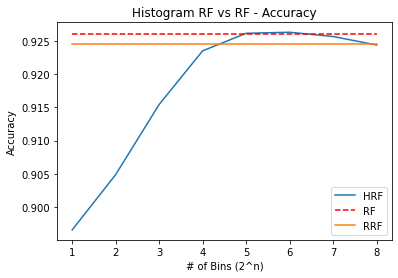

In [194]:
import matplotlib.pyplot as plt
plt.plot(num_bins, hrf_acc, label="HRF")
plt.plot(num_bins, rf_acc, 'r--', label="RF")
plt.plot(num_bins, real_rf_acc, label="RRF")
plt.legend()
plt.title("Histogram RF vs RF - Accuracy")
plt.xlabel("# of Bins (2^n)")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Time (s)')

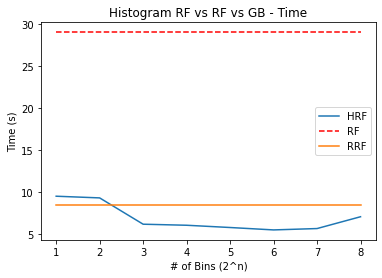

In [195]:
plt.figure()
plt.plot(num_bins, hrf_time, label="HRF")
plt.plot(num_bins, rf_time, 'r--', label="RF")
plt.plot(num_bins, real_rf_time, label="RRF")
plt.legend()
plt.title("Histogram RF vs RF vs GB - Time")
plt.xlabel("# of Bins (2^n)")
plt.ylabel("Time (s)")